<a href="https://colab.research.google.com/github/XaviPat01/ML_TechAnalogy_Workshop/blob/main/Minor%20Project%203/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as nd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [19]:
url = "https://raw.githubusercontent.com/XaviPat01/ML_TechAnalogy_Workshop/main/Minor%20Project%203/income.csv"

data = pd.read_csv(url)

In [32]:
data.head()

,Name,age,income
0,Rob,27,0.213675
1,Michael,29,0.384615
2,Mohan,29,0.136752
3,Ismail,28,0.128205
4,Kory,42,0.897436


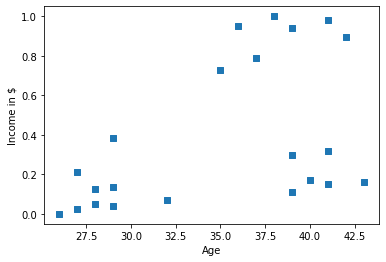

In [33]:
data.rename(columns={'Income($)':'income','Age':'age'}, inplace = True)

plt.scatter(data.age,data.income,marker=',')
plt.xlabel('Age')
plt.ylabel('Income in $')
plt.show()

We can clearly see three clusters should be performed. We'll use the elbow plot method later to confirm our inference.

In [34]:
data.describe()

,age,income
count,22.000000,22.000000
mean,34.818182,0.388306
std,5.901060,0.371846
min,26.000000,0.000000
25%,29.000000,0.115385
50%,36.500000,0.192308
75%,39.750000,0.771368
max,43.000000,1.000000


As we can clearly see, their is a considerable difference in the range of age(of the order of 10) v/s range of income (of the order of 10^5).

This suggests that we should use MinMaxScaler to normalize them.

In [35]:
scaler = MinMaxScaler()

scaler.fit(data[['income']])
data.income = scaler.transform(data[['income']])

scaler.fit(data[['age']])
data.age = scaler.transform(data[['age']])

In [36]:
data.head()

,Name,age,income
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


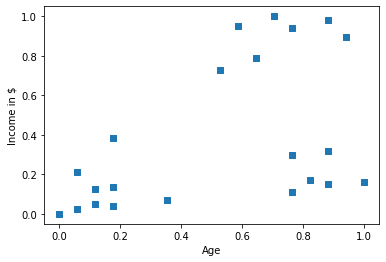

In [37]:
plt.scatter(data.age,data.income,marker=',')
plt.xlabel("Age")
plt.ylabel("Income in $")
plt.show()

In [65]:
inertias=[]
range_k = range(1,15)
for k in range_k:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(data[['age','income']])
  inertias.append(kmeans.inertia_)

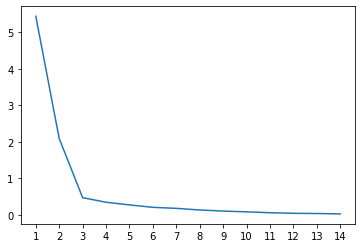

In [66]:
plt.plot(range_k,inertias)
plt.xticks(range_k)
plt.show()

Hence, our inference from the scatter plot was correct. We'll take number of clusters = 3.

In [76]:
kmeans = KMeans(n_clusters=3)
pred_Y = kmeans.fit_predict(data[['age','income']])
data['clusternum']=pred_Y
data.head()

,Name,age,income,clusternum
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2


In [77]:
centroid = kmeans.cluster_centers_


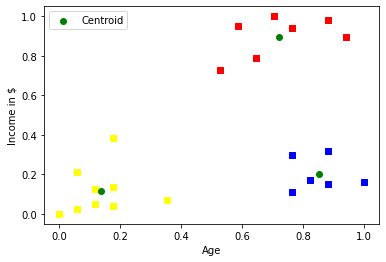

In [80]:
data_1 = data[data.clusternum==0]
data_2 = data[data.clusternum==1]
data_3 = data[data.clusternum==2]
plt.scatter(data_1.age,data_1.income, marker=',',color='yellow')
plt.scatter(data_2.age,data_2.income,marker=',',color='blue')
plt.scatter(data_3.age,data_3.income,marker=',',color='red')

plt.scatter(centroid[:,0],centroid[:,1],color='green',label='Centroid')

plt.xlabel("Age")
plt.ylabel("Income in $")
plt.legend()
plt.show()